In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as pp


%matplotlib inline

In [2]:
data = pd.read_csv('summarydata.txt', header=0, names=['Booking Time', 'User ID', 'Picked Up Time', 'Dropped Off Time',
       'Seat Count'])
data.loc[0]

IOError: File summarydata.txt does not exist

In [177]:
def convertColumns(data, cols, func):
    newCols = data[cols].applymap(func)
    data1 = data.drop(cols, axis=1)
    return pd.merge(data1, newCols, left_index=True, right_index=True)
    
def todatetime(x):
#    return x.apply(lambda t: np.datetime64(t[:-1]))
    return np.datetime64(x[:-1])

df = convertColumns(data, ['Booking Time','Picked Up Time','Dropped Off Time'], todatetime)

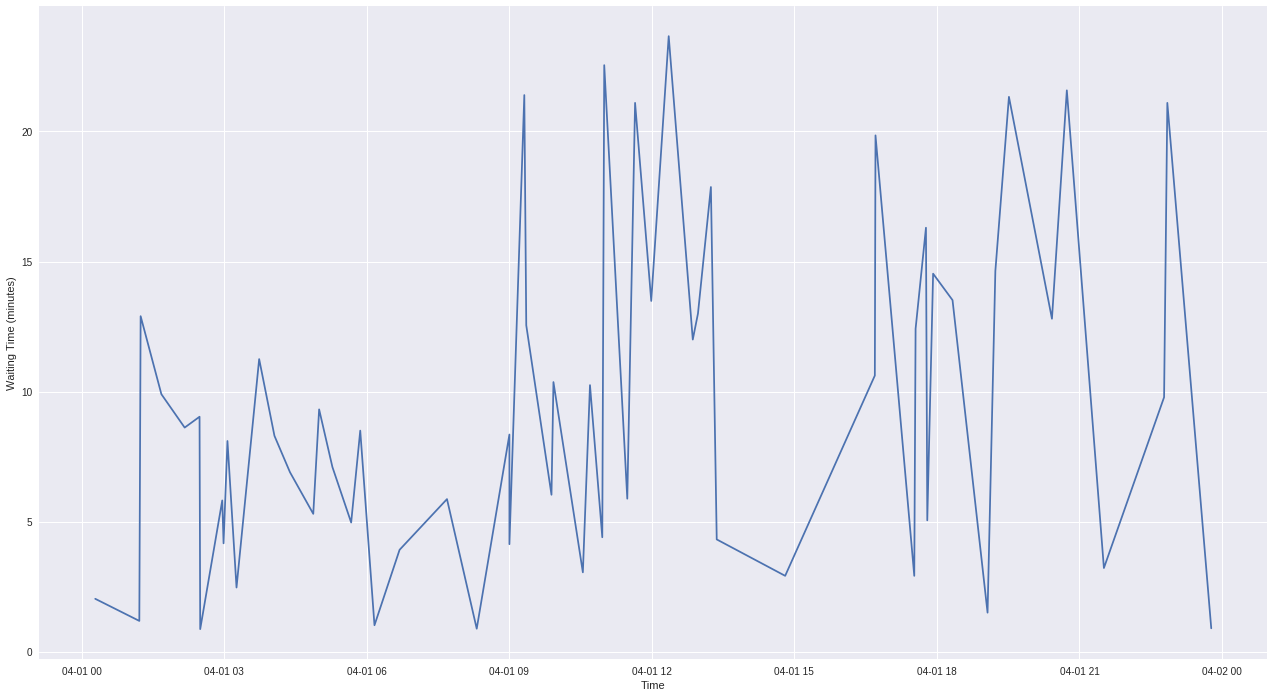

In [178]:
df['Wait Time'] = (df['Picked Up Time'] - df['Booking Time']).apply(lambda x: x.seconds/60)
df_sorted = df.sort_values(by=['Booking Time'])

pp.figure(figsize=(22,12))
pp.plot(df_sorted['Booking Time'], df_sorted['Wait Time'])
pp.xlabel('Time')
pp.ylabel('Waiting Time (minutes)')

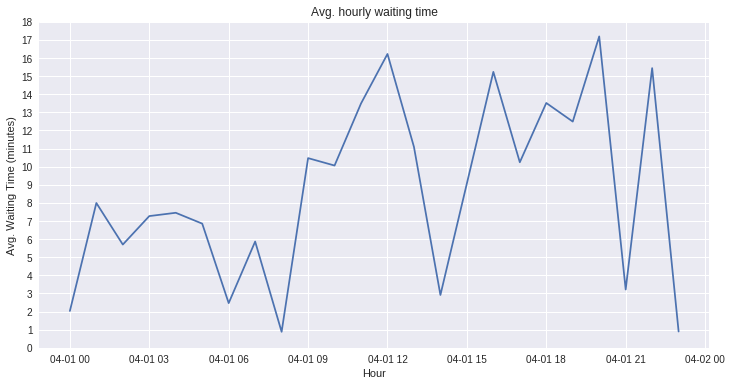

In [198]:
def tohr(x):
    return x.to_datetime64().astype('datetime64[h]')

df_hr = convertColumns(df_sorted, ['Booking Time','Picked Up Time','Dropped Off Time'], tohr)
wait_hr_avg = df_hr.groupby('Booking Time').mean()

pp.figure(figsize=(12,6))
pp.plot(wait_hr_avg.index, wait_hr_avg['Wait Time'])
pp.title('Avg. hourly waiting time')
pp.yticks(range(0,19))
pp.xlabel('Hour')
pp.ylabel('Avg. Waiting Time (minutes)')

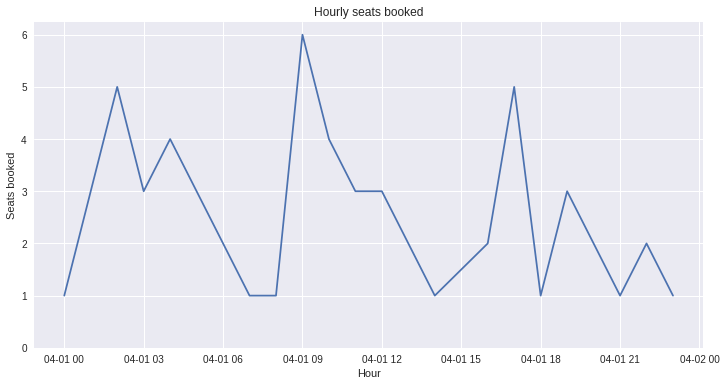

In [199]:
seats_hr = df_hr.groupby('Booking Time').sum()


pp.figure(figsize=(12,6))
pp.title('Hourly seats booked')
pp.plot(wait_hr_avg.index, seats_hr['Seat Count'])
pp.yticks(range(0,7))
pp.xlabel('Hour')
pp.ylabel('Seats booked')

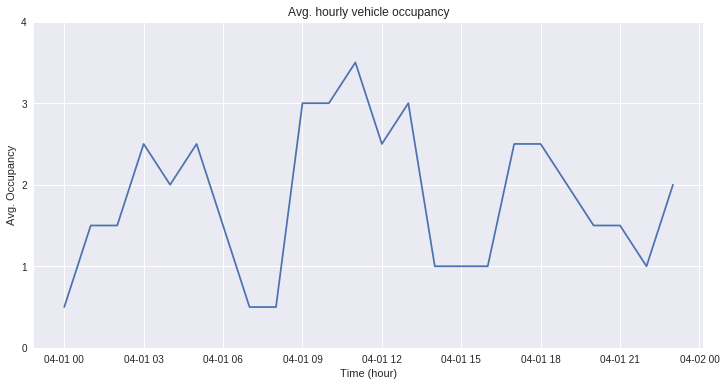

In [200]:
def inVehicle(df, t):
    return df[(df['Picked Up Time'] <= t) & (df['Dropped Off Time'] >= t)]

hr_range = np.arange(df_hr['Booking Time'].min(), df_hr['Booking Time'].max()+np.timedelta64(1,'h'), np.timedelta64(1, 'h'))
nVehicles = 2
occ = pd.Series([inVehicle(df_hr, t)['Seat Count'].sum()/nVehicles for t in hr_range], index=hr_range)

pp.figure(figsize=(12,6))
pp.plot(occ)
pp.title('Avg. hourly vehicle occupancy')
pp.yticks(range(0,5))
pp.xlabel('Time (hour)')
pp.ylabel('Avg. Occupancy')   